In [49]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

names = ['Class','Alcohol','Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',  'OD280/OD315_of_diluted wines', 
         'Proline']

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

In [50]:
wine = pd.read_csv('/Users/pierceboisclair/Desktop/wine.data', names=names)
wine.describe()


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


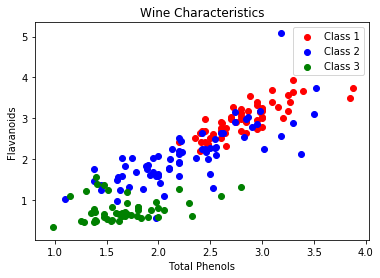

In [103]:
# Look at our data.
plt.scatter(
    wine[wine['Class'] == 1].Total_phenols,
    wine[wine['Class'] == 1].Flavanoids,
    color='red'
)
plt.scatter(
    wine[wine['Class'] == 2].Total_phenols,
    wine[wine['Class'] == 2].Flavanoids,
    color='blue'
)
plt.scatter(
    wine[wine['Class'] == 3].Total_phenols,
    wine[wine['Class'] == 3].Flavanoids,
    color='green'
)
plt.legend(['Class 1', 'Class 2', 'Class 3'])
plt.title('Wine Characteristics')
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')
plt.show()

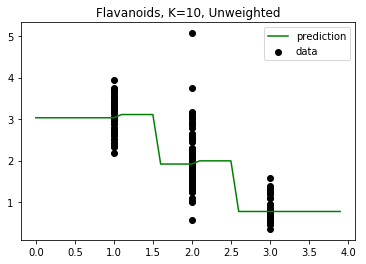

In [111]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(wine.Class)
Y = wine.Flavanoids
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 4, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Flavanoids, K=10, Unweighted')
plt.show()

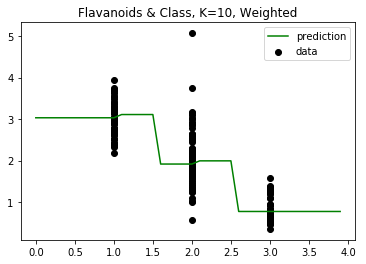

In [147]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(wine.Class)
Y = wine.Flavanoids
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 4, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Flavanoids & Class, K=10, Weighted')
plt.show()

In [148]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.17 (+/- 0.48)
Weighted Accuracy: 0.17 (+/- 0.48)


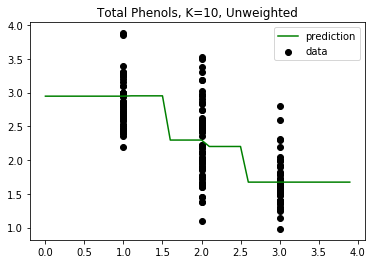

In [153]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(wine.Class)
Y = wine.Total_phenols
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 4, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Total Phenols, K=10, Unweighted')
plt.show()

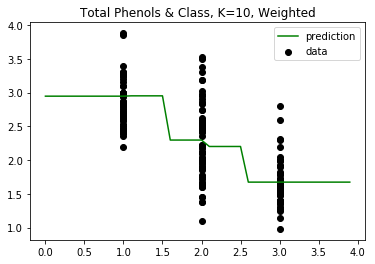

In [152]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(wine.Class)
Y = wine.Total_phenols
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 4, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Total Phenols & Class, K=10, Weighted')
plt.show()

In [154]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.14 (+/- 0.44)
Weighted Accuracy: 0.14 (+/- 0.44)


In [143]:
regr = linear_model.LinearRegression()
Y = wine['Class'].values.reshape(-1, 1)
X = wine[['Total_phenols','Flavanoids']]
regr.fit(X, Y)

display(wine.head())

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



Coefficients: 
 [[ 0.0664575  -0.69359121]]

Intercept: 
 [3.19315841]

R-squared:
0.7189793581866843


## The model where the outcome Class is predicted by the features Total Phenols and Flavanoids explains 71.90% of the variance in Class.

In [134]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Total_phenols,Flavanoids
Total_phenols,1.000000,0.864564
Flavanoids,0.864564,1.000000


## There is high multicollinearity. There is high correlation between Total Phenols and Flavanoids. 

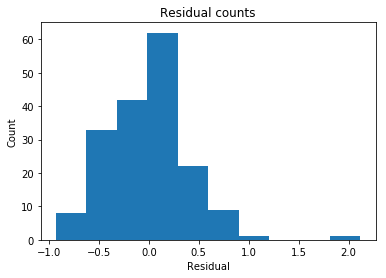

In [135]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = wine['Class']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

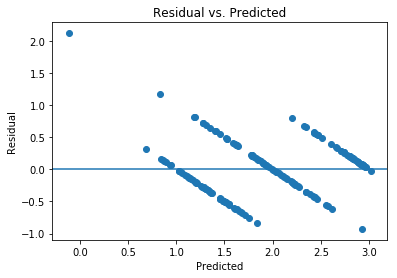

In [136]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Go Over with Baolin. Confused how R Squared fits in with the KNN Regression. 